# Stuart-Landau tests

In [1]:
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
from NetworkFunctions import *
from NetworkClasses import *

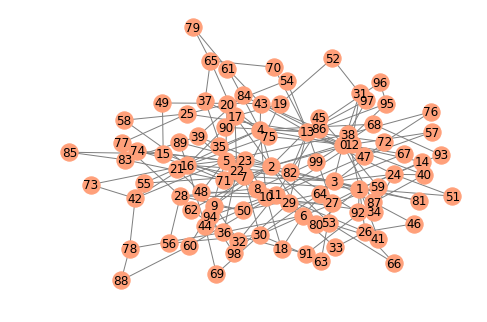

In [2]:
N = 100; # number of nodes
m = 2;
G = nx.barabasi_albert_graph(N,m,seed=None); # Barabasi-Albert graph

A = nx.to_numpy_matrix(G); # creates adjacency matrix

w = np.random.uniform(-2, 2, N); # defines natural frequencies
K = .5 # coupling constant
alpha = 1 # SL parameter

F = np.zeros(N)
for i in range(int(N/5)):
    F[5*i] = 1
Omega = np.pi

# initial conditions
theta0 = np.random.uniform(0, 2*np.pi, N)
rho0 = np.random.uniform(0.1, 0.9, N) # so the system doesn't fall into the attractor
z0 = rho0*np.exp(1j*theta0)
z0[:5]

nx.draw(G, node_color='lightsalmon', edge_color='grey', with_labels=True)
plt.show()

## Stuart-Landau Model

The equations for a (forced) complex network of $N$ Stuart-Landau oscillators with natural frequencies $\omega_k$, limit cycle parameter $\alpha$, adjacency matrix $A$, coupling strength (or average coupling strength, for the case where $A$ is weighted) $\lambda$ and a forced term of type $ F_k e^{i \Omega t} $ that acts on a fraction $f = N_F/N$, where $N_F$ is the number of forced oscillators (nonzero $F$), can be written in the following forms:

### 1. Complex Form

$$ \dot{z}_k (z,t) = \{ \alpha^2 + i \omega - |z_k|^2 \} z_k + \lambda \sum_{j=1}^N A_{ij} (z_j - z_k) + F_k e^{i \Omega t} $$

### 2. Real Polar Form

Substituting $z_k = \rho_k e^{i \theta_k}$ in the above equation, we find:

$$ \dot{\rho}_i (\rho, \theta, t) = \rho_i (\alpha^2 - \rho_i^2) + \lambda \sum_{j=1}^N A_{ij} \left\{ \rho_j \cos{(\theta_j - \theta_i)} - \rho_i \right\} + F_i \cos{(\Omega t - \theta_i)} $$

$$ \dot{\theta}_i (\rho, \theta, t) = \omega_i + \lambda \sum_{j=1}^N A_{ij} \frac{\rho_j}{\rho_i} \sin{(\theta_j - \theta_i)} + F_i \sin{(\Omega t - \theta_i)} $$

The Jacobian is then:

$$ J = \left[ \begin{matrix} \frac{\partial \dot{\rho}}{\partial \rho} && \frac{\partial \dot{\rho}}{\partial \theta} \\
\frac{\partial \dot{\theta}}{\partial \rho} && \frac{\partial \dot{\theta}}{\partial \theta} \end{matrix} \right] $$

where, for a network with no self-edges ($A_{jj} = 0\ \forall j$):

$$ \frac{\partial \dot{\rho}_i}{\partial \rho_j} = (\alpha^2 - 3\rho_i^2 - \lambda A_{ij}) \delta_{ij} + \lambda A_{ij} \cos{(\theta_j - \theta_i)} $$

$$ \frac{\partial \dot{\rho}_i}{\partial \theta_j} = - \lambda A_{ij} \rho_j \sin{(\theta_j - \theta_i)} - \delta_{ij} F_i \sin{(\Omega t - \theta_i)} $$

$$ \frac{\partial \dot{\theta}_i}{\partial \rho_j} = \frac{\lambda}{\rho_i} A_{ij} \sin{(\theta_j - \theta_i)} $$

$$ \frac{\partial \dot{\theta}_i}{\partial \rho_j} = \lambda A_{ij} \frac{\rho_j}{\rho_i} \cos{(\theta_j - \theta_i)} + \delta_{ij} F_i \cos{(\Omega t - \theta_i)}$$

### 3. Real Rectangular Form

Substituting $z_k = x_k + iy_k$ in the complex system holds:

$$ \dot{x}_i (x, y, t) = (\alpha^2 - x^2_i - y_i^2) x_i - \omega_i y_i + \lambda \sum_{j=1}^N A_{ij} (x_j - x_i) + F_i \cos{(\Omega t)} $$

$$ \dot{y}_i (x, y, t) = (\alpha^2 - x^2_i - y_i^2) y_i + \omega_i x_i + \lambda \sum_{j=1}^N A_{ij} (y_j - y_i) + F_i \sin{(\Omega t)} $$

The Jacobian is then defined by:

$$ J = \left[ \begin{matrix} \frac{\partial \dot{x}}{\partial x} && \frac{\partial \dot{x}}{\partial y} \\
\frac{\partial \dot{y}}{\partial x} && \frac{\partial \dot{y}}{\partial y} \end{matrix} \right] $$

where:

$$ \frac{\partial \dot{x}_i}{\partial x_j} = \delta_{ij} (\alpha^2 - y_i^2 - 3x_i^2) + \lambda A_{ij} $$

$$ \frac{\partial \dot{x}_i}{\partial y_j} = - \delta_{ij} (2 x_i y_i + \omega_i) $$

$$ \frac{\partial \dot{y}_i}{\partial x_j} = - \delta_{ij} (2 x_i y_i - \omega_i) $$

$$ \frac{\partial \dot{y}_i}{\partial y_j} = \delta_{ij} (\alpha^2 - x_i^2 - 3y_i^2) + \lambda A_{ij} $$

with $k_i = \sum_{i=1}^N A_{ij} (1 - \delta_{ij})$ being the node degree of the $i$th node (excluding self-edges)

## Kuramoto Model

The equations for a (forced) complex network of $N$ Kuramoto oscillators with natural frequencies $\omega_k$, adjacency matrix $A$, coupling strength (or average coupling strength, for the case where $A$ is weighted) $\lambda$ and a forced term of type $ F_i \cos{(\Omega t - \theta)} $ that acts on a fraction $f = N_F/N$, where $N_F$ is the number of forced oscillators (nonzero $F$), can be written as:

$$ \dot{\theta}_i = \omega_i + \lambda \sum_{j=1}^N A_{ij} \sin{(\theta_j - \theta_i)} + F_i \sin{(\Omega t - \theta_i)} $$

which gives the Jacobian:

$$ J_{ij} = \frac{\partial \dot{\theta}_i}{\partial \theta_j} = A_{ij} \cos{(\theta_j - \theta_i)} - \delta_{ij} F_i \cos{(\Omega t - \theta_i)} $$

In [3]:
SL = StuartLandau(w, A, K, alpha)
SLforced = StuartLandau(w, A, K, alpha, F, Omega)
kuramoto = KuramotoNetwork(w, A, K)
Kforced = KuramotoNetwork(w, A, K, F, Omega)

In [4]:
%%time
t = np.arange(0,50,.2)
z, _ = SL.integrate(z0, t)
z_f, _ = SLforced.integrate(z0, t)

CPU times: user 3min 14s, sys: 718 ms, total: 3min 15s
Wall time: 3min 17s


In [5]:
%%time
theta, _ = kuramoto.integrate(theta0, t)
theta_f, _ = Kforced.integrate(theta0, t)

CPU times: user 22 s, sys: 19.9 ms, total: 22.1 s
Wall time: 22.1 s


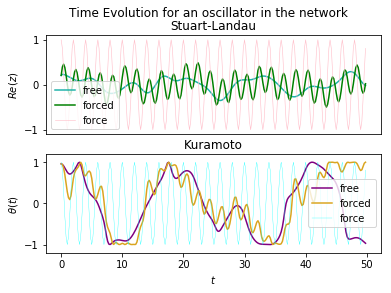

In [6]:
osc=5
fig, (ax1, ax2) = plt.subplots(2, 1)

fig.suptitle('Time Evolution for an oscillator in the network')

ax1.set_title('Stuart-Landau')
ax1.set_ylabel('$Re(z)$')
ax1.set_xticks([])

ax2.set_title('Kuramoto')
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$\theta(t)$')
ax2.set_ylim([-1.2, 1.2])

ax1.plot(t, np.real(z[osc]), label='free', color='lightseagreen')
ax1.plot(t, np.real(z_f[osc]), label='forced', color='g')
ax1.plot(t, F[osc]*np.cos(Omega*t), label='force', color='pink', linewidth='.6')
ax1.legend()

ax2.plot(t, np.cos(theta[i*osc]), label='free', color='purple')
ax2.plot(t, np.cos(theta_f[i*osc]), label='forced', color='goldenrod')
ax2.plot(t, F[osc]*np.cos(Omega*t), label='force', color='cyan', linewidth='.3')
ax2.legend()

plt.show()

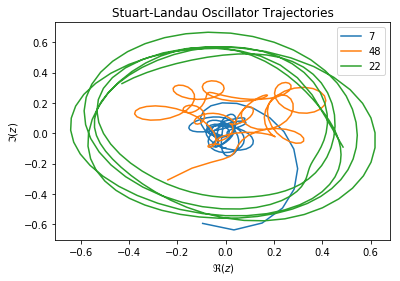

In [7]:
fig, ax = plt.subplots(1,1)

ax.set_title('Stuart-Landau Oscillator Trajectories')
ax.set_xlabel(r'$\Re(z)$')
ax.set_ylabel(r'$\Im(z)$')

for i in [7, 48, 22]:
    ax.plot(np.real(z[i]), np.imag(z[i]), label=i)

ax.legend()
plt.show()

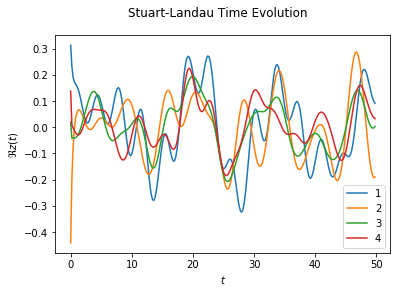

In [8]:
osc=5
fig, ax = plt.subplots(1, 1)

fig.suptitle('Stuart-Landau Time Evolution')

ax.set_xlabel('$t$')
ax.set_ylabel(r'$\Re{z(t)}$')

for osc in range(4):
    ax.plot(t, np.real(z[osc]), label=osc+1)
ax.legend()

plt.show()

## Order Parameter

For a network of N oscillators with phase $\theta_i$, we can measure the system's synchronization with:

$$ \mathrm{z}(t) = r(t) e^{i \psi(t)} = \frac{1}{N} \sum_{j=1}^N e^{i \theta_j(t)} $$

The real part $r$ is called order parameter, whereas $\psi$ is the mean phase of the system. When the system is not synchronized, $r \approx 0$, whereas global synchronization is said to be achieved when $r \to 1$.

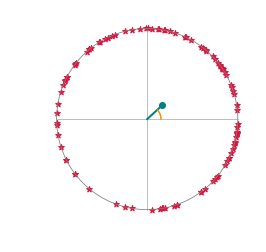

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.axis('off')

# Plots points corresponding to the oscillators' phase positions at time t
ax.scatter(np.cos(theta[:,200]), y = np.sin(theta[:,200]), marker = '*', color='crimson')

# Finds the order parameter at the time instant t
thetaT = np.transpose(theta)
order_par = sum(np.exp(thetaT[200]*1j))/N
r = np.absolute(order_par)
psi = np.angle(order_par)

# Plots horizontal and vertical diameters of the circle
ax.plot([-1, 1], [0, 0], linewidth = '.5', color = 'grey')
ax.plot([0, 0], [-1, 1], linewidth = '.5', color = 'grey')

#Plots unit circle
circle = plt.Circle((0,0), radius = 1.0, linewidth = '0.8', color = 'grey', fill = False)
ax.add_patch(circle)

#Plots order parameter line
ax.plot([0, r*np.cos(psi)], [0, r*np.sin(psi)], linewidth = '2.0', color = 'teal')
ax.scatter(r*np.cos(psi), r*np.sin(psi), marker='o', color='teal')

# Shows mean phase
s = np.arange(0,1,0.05)
if r>0.4:
    ax.plot(0.25*np.cos(psi*s), 0.25*np.sin(psi*s), color='darkorange')
else:
    ax.plot((2*r/3)*np.cos(psi*s), (2*r/3)*np.sin(psi*s), color='darkorange')

plt.show()

### Average in time

In practice, we actually calculate the mean value of $r$ and $psi$ (as well as their standard deviation) over a time interval $[t_0, t_0 + \Delta t]$ corresponding to at least one full oscillation period of the system so one can be sure our data is statistically relevant and time fluctuations are accounted for:

$$ \langle r \rangle = \frac{1}{\Delta t} \int_{t_0}^{t_0+\Delta t} r(t) dt $$

since we find the time evolution of the phase through numerical integration already, the integral above is performed as a Riemmann sum of the numerically obtained values. We also find it's useful to computate the angular velocity $\dot{\psi} = \frac{d \psi}{dt}$ of the mean phase, for it produces more insights on the colective dyamical behavior of the system.

We may then calculate such parameters for a range of different coupling constants $\lambda$ the  to see how the synchronization behavior is affected.

In [10]:
%%time
sync_par = OrderParameter(SL, z0, 40, 45, 0.1, Kf=3, dK=.2, dt=.5)

CPU times: user 14min 17s, sys: 14.3 s, total: 14min 32s
Wall time: 8min 47s


In [11]:
K = sync_par['K']
r = sync_par['r']
r_std = sync_par['r_std']
psi = sync_par['psi']
psi_std = sync_par['psi_std']
psidot = sync_par['psidot']
psidot_std = sync_par['psidot_std']

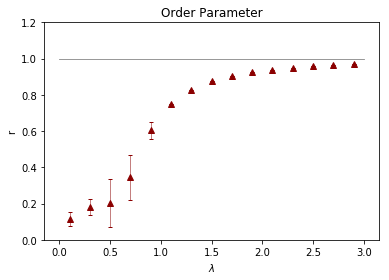

In [12]:
fig, ax1 = plt.subplots(1, 1)

ax1.set_title("Order Parameter")
ax1.set_ylabel("r")
ax1.set_xlabel(r'$\lambda$')

ax1.set_ylim(0,1.2)
ax1.errorbar(K ,r, yerr=r_std, marker='^', color = 'darkred', fmt='o', elinewidth=.5, capsize=2)
ax1.plot([0, 3], [1, 1], linewidth = .8, color = 'grey')

plt.show()

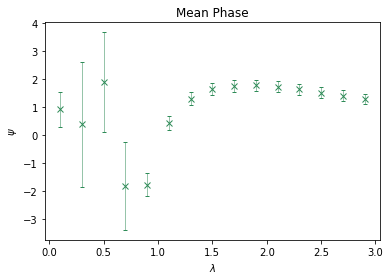

In [13]:
fig, ax2 = plt.subplots(1,1)

ax2.set_title("Mean Phase")
ax2.set_ylabel(r'$\psi$')
ax2.set_xlabel(r'$\lambda$')
ax2.errorbar(K ,psi, yerr=psi_std, marker='x', color = 'seagreen', fmt='o', elinewidth=.5, capsize=2)

plt.show()

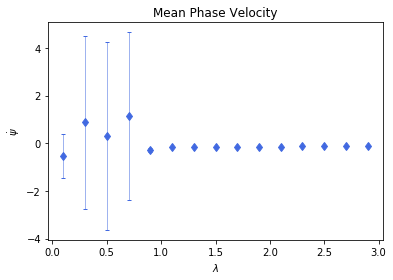

In [14]:
fig, ax3 = plt.subplots(1,1)

ax3.set_title("Mean Phase Velocity")
ax3.set_xlabel(r'$\lambda$')
ax3.set_ylabel(r'$\dot{\psi}$')
ax3.errorbar(K ,psidot, yerr=psidot_std, marker='d', color = 'royalblue', fmt='o', elinewidth=.5, capsize=2)

plt.show()

### Average in initial states

To assure statistical relevance, what may also be done is to find such parameters for a set with several different initial conditions and then take the average. This way, there can be certainty on the fact that the main dynamical properties of the systems indeed depends on the network itself, not relying on any specific initial configuration. We define the standard deviation $\sigma^{(r)}_{z_0}$ of $r$ in the initial conditions as:

$$ \sigma^{(r)}_{z_0} = \langle \ \langle r + \sigma^{(r)}_t \rangle_t + \langle r \rangle_t \ \rangle_{z0} $$

where $\langle \rangle_t$ is the time average, $\sigma^{(r)}_t$ the standard deviation with respect to time (both for a single initial condition $z_0$), and $\langle \rangle_{z_0}$ the average through all initial states $z_0$. It's worth to remark that we mantain $0.1 < \rho_0 < 0.9$ in the Stuart-Landau case, as for larger values of $\rho$ the system may fall into one of its attractors, which is not the situation we desire to analyze.

In [15]:
%%time
sync_par_av = AverageOrderPar(SL, 5, 40, 45, 0, Kf=3, dK=0.2, dt=0.5)

CPU times: user 46min 17s, sys: 36.6 s, total: 46min 53s
Wall time: 27min 32s


In [16]:
K_av = sync_par_av['K']
r_av = sync_par_av['r']
r_std_av = sync_par_av['r_std']
psi_av = sync_par_av['psi']
psi_std_av = sync_par_av['psi_std']
psidot_av = sync_par_av['psidot']
psidot_std_av = sync_par_av['psidot_std']

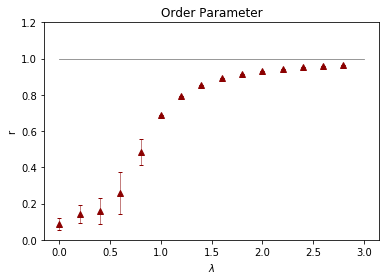

In [17]:
fig, ax1 = plt.subplots(1, 1)

ax1.set_title("Order Parameter")
ax1.set_ylabel("r")
ax1.set_xlabel(r'$\lambda$')

ax1.set_ylim(0,1.2)
ax1.errorbar(K_av ,r_av, yerr=r_std_av, marker='^', color = 'darkred', fmt='o', elinewidth=.5, capsize=2)
ax1.plot([0, 3], [1, 1], linewidth = .8, color = 'grey')

plt.show()

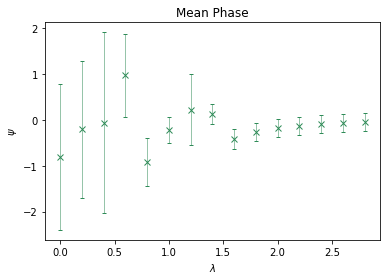

In [18]:
fig, ax2 = plt.subplots(1,1)

ax2.set_title("Mean Phase")
ax2.set_ylabel(r'$\psi$')
ax2.set_xlabel(r'$\lambda$')
ax2.errorbar(K_av ,psi_av, yerr=psi_std_av, marker='x', color = 'seagreen', fmt='o', elinewidth=.5, capsize=2)

plt.show()

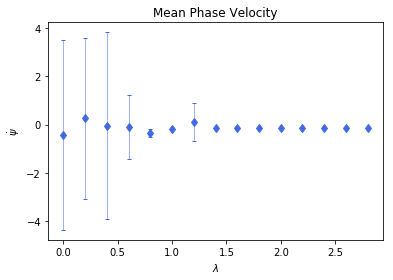

In [19]:
fig, ax3 = plt.subplots(1,1)

ax3.set_title("Mean Phase Velocity")
ax3.set_xlabel(r'$\lambda$')
ax3.set_ylabel(r'$\dot{\psi}$')
ax3.errorbar(K_av ,psidot_av, yerr=psidot_std_av, marker='d', color = 'royalblue', fmt='o', elinewidth=.5, capsize=2)

plt.show()

## Randomly distribuited coupling

Here we intend to study how a random distribution of the coupling strength may affect the overall synchronization. To achieve that, we redefine the adjacency matrix so that each nonzero element has its value defined by some probability distribution function. We also normalize the elements of $A$ by the mean value of such distribution so that the mean coupling is absorved into our coupling parameter $\lambda$.

### Gamma distribution

A Gamma distribuition of shape $k$ and scale $\theta$ (as it's used in *scipy.stats.gamma*) is defined by:

$$ f(x; k, \theta) = \frac{x^{k-1} e^{- \frac{x}{\theta}}}{\theta^k \Gamma(k)} $$

so that $\langle x \rangle = k \theta$ and $\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2 = k \theta^2 $

In [20]:
shape = 1
SLgamma, Kav, Kstd = GammaCoupling(SL, shape)

In [21]:
t = np.arange(0,50,.2)
z_gamma, t = SLgamma.integrate(z0,t)

<function matplotlib.pyplot.show>

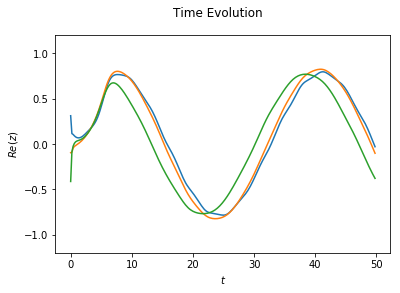

In [22]:
fig, ax1 = plt.subplots(1,1)

fig.suptitle('Time Evolution')

ax1.set_ylabel('$Re(z)$')
ax1.set_xlabel('$t$')
ax1.set_ylim([-1.2, 1.2])

for osc in range(3):
    ax1.plot(t, np.real(z_gamma[7*osc]))
plt.show

In [23]:
%%time
sync_par_gamma = OrderParameter(SLgamma, z0, 40, 55, 0.1, Kf=3, dK=.2, dt=.5)

K_gamma = sync_par['K']
r_gamma = sync_par['r']
r_std_gamma = sync_par['r_std']
psi_gamma = sync_par['psi']
psi_std_gamma = sync_par['psi_std']
psidot_gamma = sync_par['psidot']
psidot_std_gamma = sync_par['psidot_std']

CPU times: user 3min 40s, sys: 1.68 s, total: 3min 42s
Wall time: 3min 24s


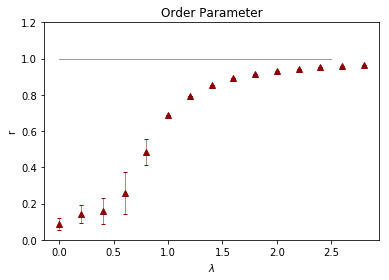

In [24]:
fig, ax1 = plt.subplots(1, 1)

ax1.set_title("Order Parameter")
ax1.set_ylabel("r")
ax1.set_xlabel(r'$\lambda$')

ax1.set_ylim(0,1.2)
ax1.errorbar(K_av ,r_av, yerr=r_std_av, marker='^', color = 'darkred', fmt='o', elinewidth=.5, capsize=2)
ax1.plot([0, 2.5], [1, 1], linewidth = .8, color = 'grey')

plt.show()

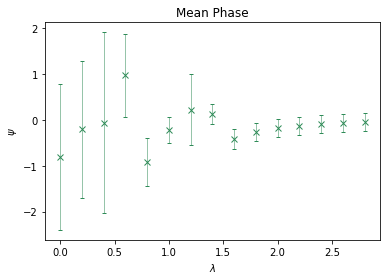

In [25]:
fig, ax2 = plt.subplots(1,1)

ax2.set_title("Mean Phase")
ax2.set_ylabel(r'$\psi$')
ax2.set_xlabel(r'$\lambda$')
ax2.errorbar(K_av ,psi_av, yerr=psi_std_av, marker='x', color = 'seagreen', fmt='o', elinewidth=.5, capsize=2)

plt.show()

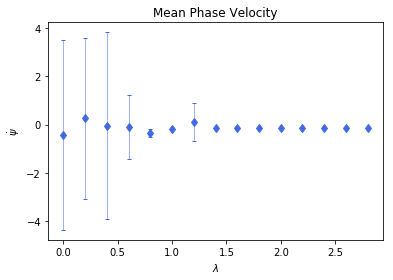

In [26]:
fig, ax3 = plt.subplots(1,1)

ax3.set_title("Mean Phase Velocity")
ax3.set_xlabel(r'$\lambda$')
ax3.set_ylabel(r'$\dot{\psi}$')
ax3.errorbar(K_av ,psidot_av, yerr=psidot_std_av, marker='d', color = 'royalblue', fmt='o', elinewidth=.5, capsize=2)

plt.show()